In [1]:
import pandas as pd
import numpy as np

In [2]:
from scipy import stats

In [3]:
import geopandas

In [4]:
import geoplot

In [5]:
import mapclassify

In [6]:
import folium

In [63]:
import plotly.plotly as pl
import plotly.graph_objs as gobj


ModuleNotFoundError: No module named 'plotly'

In [7]:
world=geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

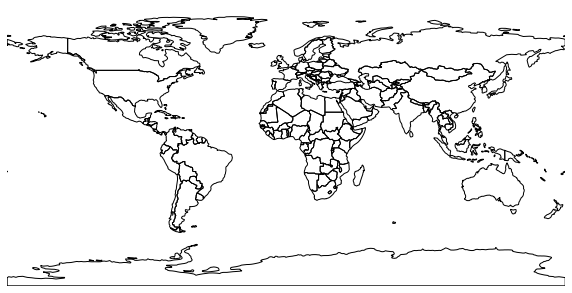

In [8]:
geoplot.polyplot(world, figsize=(10,10))

In [9]:
raw_gdp_df=pd.read_csv('/home/vamsi/Downloads/Srinivas/gdp.csv', skiprows=4)

In [10]:
raw_gdp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10,NaN,NaN
2,Angola,AGO,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10,NaN,NaN
3,Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10,NaN,NaN
4,Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.262389e+09,6.477787e+09,6.556957e+09,6.825477e+09,7.103339e+09,7.403500e+09,7.685989e+09,8.006622e+09,NaN,NaN
260,"Yemen, Rep.",YEM,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.762254e+10,2.895489e+10,2.890028e+10,2.080981e+10,1.885888e+10,1.790235e+10,1.803709e+10,NaN,NaN,NaN
261,South Africa,ZAF,GDP (constant 2010 US$),NY.GDP.MKTP.KD,7.907096e+10,8.211104e+10,8.718376e+10,9.361236e+10,1.010450e+11,1.072317e+11,...,3.962572e+11,4.061050e+11,4.136057e+11,4.185431e+11,4.202134e+11,4.261574e+11,4.295115e+11,4.301669e+11,NaN,NaN
262,Zambia,ZMB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,4.592976e+09,4.655504e+09,4.539543e+09,4.688094e+09,5.260700e+09,6.136473e+09,...,2.301863e+10,2.418280e+10,2.531884e+10,2.605814e+10,2.704230e+10,2.798995e+10,2.911929e+10,2.961601e+10,NaN,NaN


In [11]:
raw_gdp_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,1.180000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.280000e+02,1.320000e+02,1.330000e+02,1.370000e+02,1.370000e+02,...,2.470000e+02,2.470000e+02,2.460000e+02,2.450000e+02,2.440000e+02,2.440000e+02,2.380000e+02,2.220000e+02,0.0,0.0
mean,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,2.303293e+12,2.373206e+12,2.456917e+12,2.540814e+12,2.625478e+12,2.719552e+12,2.864567e+12,3.154333e+12,NaN,NaN
std,1.821041e+12,1.873787e+12,1.979872e+12,2.086347e+12,2.224496e+12,2.296070e+12,2.398362e+12,2.499331e+12,2.620008e+12,2.774689e+12,...,7.762187e+12,7.959100e+12,8.195997e+12,8.447790e+12,8.681360e+12,8.967239e+12,9.351915e+12,9.894546e+12,NaN,NaN
min,9.937234e+07,1.042339e+08,1.093337e+08,1.147528e+08,1.204903e+08,1.264311e+08,1.324629e+08,1.363826e+08,1.452607e+08,1.494164e+08,...,3.290294e+07,3.440885e+07,3.487269e+07,3.806106e+07,3.921611e+07,4.082163e+07,4.184217e+07,4.592433e+07,NaN,NaN
25%,3.467395e+09,3.733983e+09,3.967419e+09,4.014336e+09,4.019879e+09,4.428296e+09,4.514931e+09,4.769609e+09,5.009745e+09,5.229035e+09,...,8.570529e+09,9.149887e+09,9.998865e+09,1.035808e+10,1.094002e+10,1.137990e+10,1.225985e+10,1.403730e+10,NaN,NaN
50%,2.817010e+10,2.696066e+10,2.890090e+10,3.075947e+10,3.291115e+10,3.142094e+10,2.597532e+10,2.670031e+10,3.318952e+10,3.598848e+10,...,4.493365e+10,4.680715e+10,4.806137e+10,4.916596e+10,5.229079e+10,5.497840e+10,5.649900e+10,6.816900e+10,NaN,NaN
75%,2.466067e+11,2.302431e+11,2.300005e+11,2.432619e+11,2.671948e+11,2.599948e+11,2.531799e+11,2.659457e+11,2.856024e+11,3.220621e+11,...,5.100546e+11,5.166349e+11,5.339354e+11,5.563612e+11,5.912976e+11,6.154337e+11,6.227448e+11,9.122954e+11,NaN,NaN
max,1.135594e+13,1.184867e+13,1.249938e+13,1.316831e+13,1.405267e+13,1.482459e+13,1.567496e+13,1.638577e+13,1.742802e+13,1.849982e+13,...,6.990555e+13,7.176709e+13,7.381063e+13,7.593575e+13,7.790414e+13,8.044535e+13,8.289275e+13,8.494441e+13,NaN,NaN


In [12]:
raw_gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            118 non-null    float64
 5   1961            122 non-null    float64
 6   1962            122 non-null    float64
 7   1963            122 non-null    float64
 8   1964            122 non-null    float64
 9   1965            128 non-null    float64
 10  1966            132 non-null    float64
 11  1967            133 non-null    float64
 12  1968            137 non-null    float64
 13  1969            137 non-null    float64
 14  1970            153 non-null    float64
 15  1971            153 non-null    float64
 16  1972            153 non-null    float64
 17  1973            153 non-null    flo

In [11]:
raw_gdp_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [12]:
raw_gdp_df[['Unnamed: 65','2020']]

,Unnamed: 65,2020
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
259,NaN,NaN
260,NaN,NaN
261,NaN,NaN
262,NaN,NaN


Dropping some unnecessary columns from the dataset.

In [13]:
raw_gdp_df.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 65', '2020'], axis=1, inplace=True)

In [14]:
#Finding null values count per each feature.
# Plot missing values using  package missingno

In [15]:
raw_gdp_df.columns

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

Let us drop the records which have null values present across all years.

In [16]:
raw_gdp_df.dropna(how='all', inplace=True)

In [17]:
gdp_df=raw_gdp_df.dropna(thresh=2)

In [18]:
gdp_df.shape

(252, 61)

In [19]:
pd.options.display.max_rows=265

In [20]:
gdp_df

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192693e+10,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.449967e+09,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09
5,Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.106021e+12,2.186392e+12,2.330478e+12,2.404687e+12,2.463539e+12,2.541721e+12,2.628693e+12,2.658585e+12,2.714145e+12,2.754272e+12
6,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.897873e+11,3.098704e+11,3.237669e+11,3.401280e+11,3.547001e+11,3.728109e+11,3.842225e+11,3.933421e+11,3.980223e+11,4.047000e+11
7,Argentina,1.155739e+11,1.218470e+11,1.208089e+11,1.143961e+11,1.259848e+11,1.393006e+11,1.383816e+11,1.427988e+11,1.496852e+11,...,4.236274e+11,4.490618e+11,4.444525e+11,4.551431e+11,4.437071e+11,4.558254e+11,4.463428e+11,4.582538e+11,4.468809e+11,4.372151e+11
8,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.112310e+10,1.147904e+10,1.150200e+10,1.236465e+10,1.300761e+10,1.399619e+10
9,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.760000e+08,5.776916e+08,5.523172e+08,5.370925e+08,5.421674e+08,5.497797e+08,5.345551e+08,5.032599e+08,5.142555e+08,NaN


In [21]:
gdp_df.shape


(252, 61)

In [22]:
pd.options.display.max_rows=65

In [23]:
null_count_df=pd.DataFrame(data=gdp_df.isnull().sum(),columns=['null_count'])
null_count_df

,null_count
Country Name,0
1960,134
1961,130
1962,130
1963,130
1964,130
1965,124
1966,120
1967,119
1968,115


From above, we can observe almost allthe years are having null records. 

In [24]:
gdp_df_corr=gdp_df.corr()


In [25]:
gdp_df_corr

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1960,1.000000,0.999954,0.999910,0.999865,0.999857,0.999869,0.999801,0.999665,0.999543,0.999345,...,0.970551,0.966467,0.962304,0.958087,0.954968,0.952587,0.949062,0.945524,0.941920,0.938372
1961,0.999954,1.000000,0.999986,0.999967,0.999959,0.999954,0.999900,0.999818,0.999723,0.999550,...,0.969386,0.965218,0.960963,0.956668,0.953488,0.951061,0.947483,0.943898,0.940238,0.936635
1962,0.999910,0.999986,1.000000,0.999990,0.999972,0.999969,0.999934,0.999863,0.999766,0.999579,...,0.968420,0.964180,0.959859,0.955501,0.952277,0.949821,0.946199,0.942570,0.938867,0.935224
1963,0.999865,0.999967,0.999990,1.000000,0.999987,0.999979,0.999953,0.999904,0.999818,0.999650,...,0.968212,0.963950,0.959606,0.955231,0.951998,0.949541,0.945914,0.942280,0.938565,0.934912
1964,0.999857,0.999959,0.999972,0.999987,1.000000,0.999995,0.999971,0.999941,0.999881,0.999750,...,0.969079,0.964864,0.960570,0.956242,0.953038,0.950604,0.947011,0.943409,0.939722,0.936095
1965,0.999869,0.999954,0.999969,0.999979,0.999995,1.000000,0.999985,0.999946,0.999884,0.999747,...,0.969414,0.965227,0.960967,0.956671,0.953493,0.951078,0.947509,0.943931,0.940225,0.936623
1966,0.999801,0.999900,0.999934,0.999953,0.999971,0.999985,1.000000,0.999975,0.999921,0.999783,...,0.969141,0.964928,0.960655,0.956346,0.953161,0.950745,0.947167,0.943582,0.939880,0.936277
1967,0.999665,0.999818,0.999863,0.999904,0.999941,0.999946,0.999975,1.000000,0.999981,0.999888,...,0.969015,0.964784,0.960488,0.956163,0.952964,0.950537,0.946955,0.943365,0.939654,0.936037
1968,0.999543,0.999723,0.999766,0.999818,0.999881,0.999884,0.999921,0.999981,1.000000,0.999954,...,0.969512,0.965311,0.961043,0.956750,0.953565,0.951149,0.947584,0.944018,0.940334,0.936733
1969,0.999345,0.999550,0.999579,0.999650,0.999750,0.999747,0.999783,0.999888,0.999954,1.000000,...,0.970798,0.966679,0.962479,0.958257,0.955117,0.952729,0.949221,0.945712,0.942079,0.938521


From the above we can notice that the years are higly correlated with each other.

In [26]:
gdp_df.iloc[:,4:]

,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192693e+10,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.012347e+09,1.059415e+09,1.145755e+09,...,3.449967e+09,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.835874e+09,6.091210e+09,6.262389e+09,6.477787e+09,6.556957e+09,6.825477e+09,7.103339e+09,7.403500e+09,7.685989e+09,8.006622e+09
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.090675e+10,2.697701e+10,2.762254e+10,2.895489e+10,2.890028e+10,2.080981e+10,1.885888e+10,1.790235e+10,1.803709e+10,NaN
261,9.361236e+10,1.010450e+11,1.072317e+11,1.119910e+11,1.200505e+11,1.250367e+11,1.309333e+11,1.378055e+11,1.437022e+11,1.460801e+11,...,3.753494e+11,3.876765e+11,3.962572e+11,4.061050e+11,4.136057e+11,4.185431e+11,4.202134e+11,4.261574e+11,4.295115e+11,4.301669e+11
262,4.688094e+09,5.260700e+09,6.136473e+09,5.794652e+09,6.253571e+09,6.331637e+09,6.303973e+09,6.606381e+09,6.600697e+09,7.208547e+09,...,2.026556e+10,2.139326e+10,2.301863e+10,2.418280e+10,2.531884e+10,2.605814e+10,2.704230e+10,2.798995e+10,2.911929e+10,2.961601e+10


<h3>Data Imputation</h3>

Extracting numerical features from the data

In [27]:
years = []
for feature in gdp_df.select_dtypes(['int64','float64']):
    years.append(feature)

In [28]:
years

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

Imputing the null values present in Numerical Variables using "SimpleImputer" method

In [29]:
from sklearn.impute import SimpleImputer


Inorder to access this "SimpleImputer" method we need to assign it to a variable

In [30]:
num_si=SimpleImputer()

"fit_transform" function performs the two operations respectively:- Firstly, it fits the parameters on the data and thereby transforms it into an array. SimpleImputer too makes use of this function.

In [31]:
imputed_numerical_gdp=num_si.fit_transform(gdp_df[years])

Now, all the null values in each numerical column is replced by column mean. Passing the transformed columns to a dataframe.

In [32]:
imputed_numerical_gdp_df=pd.DataFrame(imputed_numerical_gdp,columns=years)

In [33]:
imputed_numerical_gdp_df.head(10)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,2.390503e+09,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,2.864567e+12,3.154333e+12
1,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10
2,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,8.379950e+10,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10
3,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,1.192693e+10,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10
4,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,3.449967e+09,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09
5,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,2.106021e+12,2.186392e+12,2.330478e+12,2.404687e+12,2.463539e+12,2.541721e+12,2.628693e+12,2.658585e+12,2.714145e+12,2.754272e+12
6,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,2.897873e+11,3.098704e+11,3.237669e+11,3.401280e+11,3.547001e+11,3.728109e+11,3.842225e+11,3.933421e+11,3.980223e+11,4.047000e+11
7,1.155739e+11,1.218470e+11,1.208089e+11,1.143961e+11,1.259848e+11,1.393006e+11,1.383816e+11,1.427988e+11,1.496852e+11,1.641741e+11,...,4.236274e+11,4.490618e+11,4.444525e+11,4.551431e+11,4.437071e+11,4.558254e+11,4.463428e+11,4.582538e+11,4.468809e+11,4.372151e+11
8,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.112310e+10,1.147904e+10,1.150200e+10,1.236465e+10,1.300761e+10,1.399619e+10
9,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,5.760000e+08,5.776916e+08,5.523172e+08,5.370925e+08,5.421674e+08,5.497797e+08,5.345551e+08,5.032599e+08,5.142555e+08,3.154333e+12


In [34]:
imputed_numerical_gdp_df.isnull().sum().sort_values(ascending=False)

2019    0
2018    0
1987    0
1986    0
1985    0
1984    0
1983    0
1982    0
1981    0
1980    0
1979    0
1978    0
1977    0
1976    0
1975    0
1974    0
1973    0
1972    0
1971    0
1970    0
1969    0
1968    0
1967    0
1966    0
1965    0
1964    0
1963    0
1962    0
1961    0
1988    0
1989    0
1990    0
2005    0
2017    0
2016    0
2015    0
2014    0
2013    0
2012    0
2011    0
2010    0
2009    0
2008    0
2007    0
2006    0
2004    0
1991    0
2003    0
2002    0
2001    0
2000    0
1999    0
1998    0
1997    0
1996    0
1995    0
1994    0
1993    0
1992    0
1960    0
dtype: int64

In [35]:
raw_pop_df = pd.read_csv('/home/vamsi/Downloads/Srinivas/pop.csv', skiprows=4)

In [36]:
raw_pop_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0,NaN,NaN


In [37]:
raw_pop_df.drop(['Country Code', 'Indicator Name', 'Indicator Code','2020', 'Unnamed: 65'], axis=1, inplace=True)

In [38]:
raw_pop_df

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,...,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0
260,"Yemen, Rep.",5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,6001852.0,...,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0
261,South Africa,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,20406864.0,20942145.0,...,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0
262,Zambia,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,3681955.0,3797873.0,3918872.0,...,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0


In [39]:
pop_df=raw_pop_df.dropna(thresh=2)

In [40]:
pop_df.shape

(263, 61)

Here in Population data set all the countries are having atleast one year data

Reindexing Population dataset index as per the GDP dataset index

In [41]:
gdp_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            254, 255, 256, 257, 258, 259, 260, 261, 262, 263],
           dtype='int64', length=252)

In [42]:
pop_df=pop_df.reindex(gdp_df.index)

In [43]:
pd.options.display.max_rows=255

In [44]:
pop_df

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,5.771500e+04,5.805500e+04,5.838600e+04,...,1.016690e+05,1.020460e+05,1.025600e+05,1.031590e+05,1.037740e+05,1.043410e+05,1.048720e+05,1.053660e+05,1.058450e+05,1.063140e+05
1,Afghanistan,8.996973e+06,9.169410e+06,9.351441e+06,9.543205e+06,9.744781e+06,9.956320e+06,1.017484e+07,1.039993e+07,1.063706e+07,...,2.918551e+07,3.011741e+07,3.116138e+07,3.226959e+07,3.337079e+07,3.441360e+07,3.538313e+07,3.629640e+07,3.717239e+07,3.804175e+07
2,Angola,5.454933e+06,5.531472e+06,5.608539e+06,5.679458e+06,5.735044e+06,5.770570e+06,5.781214e+06,5.774243e+06,5.771652e+06,...,2.335625e+07,2.422066e+07,2.510793e+07,2.601578e+07,2.694178e+07,2.788438e+07,2.884248e+07,2.981675e+07,3.080976e+07,3.182530e+07
3,Albania,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,1.914573e+06,1.965598e+06,2.022272e+06,...,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,2.866376e+06,2.854191e+06
4,Andorra,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,1.964700e+04,2.075800e+04,2.189000e+04,...,8.444900e+04,8.374700e+04,8.242700e+04,8.077400e+04,7.921300e+04,7.801100e+04,7.729700e+04,7.700100e+04,7.700600e+04,7.714200e+04
5,Arab World,9.219775e+07,9.472451e+07,9.733444e+07,1.000342e+08,1.028328e+08,1.057364e+08,1.087586e+08,1.118994e+08,1.151362e+08,...,3.548900e+08,3.631587e+08,3.714435e+08,3.797057e+08,3.879077e+08,3.960283e+08,4.040244e+08,4.118990e+08,4.197906e+08,4.278703e+08
6,United Arab Emirates,9.241800e+04,1.007960e+05,1.121180e+05,1.251300e+05,1.380390e+05,1.498570e+05,1.599760e+05,1.697710e+05,1.826270e+05,...,8.549988e+06,8.946777e+06,9.141596e+06,9.197910e+06,9.214175e+06,9.262900e+06,9.360980e+06,9.487203e+06,9.630959e+06,9.770529e+06
7,Argentina,2.048178e+07,2.081727e+07,2.115305e+07,2.148891e+07,2.182442e+07,2.215965e+07,2.249404e+07,2.282887e+07,2.316827e+07,...,4.078845e+07,4.126149e+07,4.173327e+07,4.220294e+07,4.266950e+07,4.313197e+07,4.359037e+07,4.404481e+07,4.449450e+07,4.493871e+07
8,Armenia,1.874121e+06,1.941492e+06,2.009526e+06,2.077578e+06,2.145001e+06,2.211319e+06,2.276034e+06,2.339127e+06,2.401143e+06,...,2.877319e+06,2.876538e+06,2.884229e+06,2.897584e+06,2.912403e+06,2.925553e+06,2.936146e+06,2.944809e+06,2.951776e+06,2.957731e+06
9,American Samoa,2.012300e+04,2.060200e+04,2.125300e+04,2.203400e+04,2.285400e+04,2.367200e+04,2.446200e+04,2.524800e+04,2.598900e+04,...,5.607900e+04,5.575900e+04,5.566700e+04,5.571300e+04,5.579100e+04,5.581200e+04,5.574100e+04,5.562000e+04,5.546500e+04,5.531200e+04


In [45]:
pop_df.shape

(252, 61)

In [46]:
years = []
for feature in pop_df.select_dtypes(['int64','float64']):
    years.append(feature)

In [47]:
imputed_numerical_pop=num_si.fit_transform(pop_df[years])

In [48]:
imputed_numerical_pop_df=pd.DataFrame(imputed_numerical_pop,columns=years)

In [49]:
per_capita_df=imputed_numerical_gdp_df.div(imputed_numerical_pop_df)

In [50]:
per_capita_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1.135272e+07,1.119723e+07,1.162964e+07,1.213734e+07,1.288916e+07,1.295016e+07,1.318238e+07,1.357683e+07,1.403457e+07,1.485008e+07,...,23512.602596,2.423300e+04,2.378126e+04,2.463576e+04,2.456323e+04,2.582225e+04,2.623103e+04,2.663021e+04,2.706379e+07,2.966997e+07
1,6.840550e+04,6.769812e+04,6.992256e+04,7.210646e+04,7.543470e+04,7.460798e+04,7.477479e+04,7.578927e+04,7.703463e+04,8.005356e+04,...,543.303042,5.287366e+02,5.761901e+02,5.875651e+02,5.836562e+02,5.741841e+02,5.710738e+02,5.715425e+02,5.683429e+02,5.714666e+02
2,1.128231e+05,1.122218e+05,1.165859e+05,1.211606e+05,1.281759e+05,1.287258e+05,1.316023e+05,1.365032e+05,1.419736e+05,1.502753e+05,...,3587.883798,3.579960e+03,3.748449e+03,3.796883e+03,3.843198e+03,3.748321e+03,3.530309e+03,3.409929e+03,3.233907e+03,3.103496e+03
3,3.825475e+05,3.739919e+05,3.820893e+05,3.903997e+05,4.052040e+05,3.983401e+05,3.973843e+05,4.009990e+05,4.051988e+05,4.189305e+05,...,4094.350334,4.209875e+03,4.276608e+03,4.327380e+03,4.413297e+03,4.524373e+03,4.681827e+03,4.864311e+03,5.074857e+03,5.209363e+03
4,4.589087e+07,4.318273e+07,4.254240e+07,4.192827e+07,4.207995e+07,4.004642e+07,3.872455e+07,3.797104e+07,3.743363e+07,3.782139e+07,...,40852.666777,4.119179e+04,3.976956e+04,3.914369e+04,4.091473e+04,4.214096e+04,4.410796e+04,4.443074e+04,4.513371e+04,4.588730e+04
5,6.675244e+03,6.553233e+03,6.717834e+03,6.878916e+03,7.148448e+03,7.025213e+03,6.995503e+03,7.043854e+03,7.116983e+03,7.363274e+03,...,5934.290684,6.020487e+03,6.274111e+03,6.333027e+03,6.350838e+03,6.418029e+03,6.506271e+03,6.454460e+03,6.465474e+03,6.437167e+03
6,6.659336e+06,6.158496e+06,5.832040e+06,5.499295e+06,5.325268e+06,4.956865e+06,4.755846e+06,4.642741e+06,4.486863e+06,4.293746e+06,...,33893.303514,3.463486e+04,3.541689e+04,3.697883e+04,3.849505e+04,4.024775e+04,4.104511e+04,4.146028e+04,4.132738e+04,4.142048e+04
7,5.642765e+03,5.853172e+03,5.711179e+03,5.323494e+03,5.772650e+03,6.286229e+03,6.151926e+03,6.255184e+03,6.460787e+03,6.980899e+03,...,10385.964432,1.088332e+04,1.064984e+04,1.078463e+04,1.039869e+04,1.056816e+04,1.023948e+04,1.040426e+04,1.004351e+04,9.729142e+03
8,3.283899e+05,3.197293e+05,3.253885e+05,3.312158e+05,3.427013e+05,3.359176e+05,3.342750e+05,3.369645e+05,3.412634e+05,3.540849e+05,...,3218.372707,3.370551e+03,3.603596e+03,3.705357e+03,3.819218e+03,3.923717e+03,3.917380e+03,4.198795e+03,4.406706e+03,4.732070e+03
9,3.058403e+07,3.013066e+07,3.076632e+07,3.123022e+07,3.216481e+07,3.137973e+07,3.110217e+07,3.121843e+07,3.152958e+07,3.265871e+07,...,10271.224523,1.036051e+04,9.921806e+03,9.640344e+03,9.717829e+03,9.850565e+03,9.589980e+03,9.048183e+03,9.271712e+03,5.702801e+07


In [51]:
per_capita_df.index = gdp_df.index

In [52]:
per_capita_df['Country Name'] = gdp_df['Country Name'].values

In [53]:
per_capita_df.reset_index(drop=True, inplace=True)

In [54]:
per_capita_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country Name
0,1.135272e+07,1.119723e+07,1.162964e+07,1.213734e+07,1.288916e+07,1.295016e+07,1.318238e+07,1.357683e+07,1.403457e+07,1.485008e+07,...,2.423300e+04,2.378126e+04,2.463576e+04,2.456323e+04,2.582225e+04,2.623103e+04,2.663021e+04,2.706379e+07,2.966997e+07,Aruba
1,6.840550e+04,6.769812e+04,6.992256e+04,7.210646e+04,7.543470e+04,7.460798e+04,7.477479e+04,7.578927e+04,7.703463e+04,8.005356e+04,...,5.287366e+02,5.761901e+02,5.875651e+02,5.836562e+02,5.741841e+02,5.710738e+02,5.715425e+02,5.683429e+02,5.714666e+02,Afghanistan
2,1.128231e+05,1.122218e+05,1.165859e+05,1.211606e+05,1.281759e+05,1.287258e+05,1.316023e+05,1.365032e+05,1.419736e+05,1.502753e+05,...,3.579960e+03,3.748449e+03,3.796883e+03,3.843198e+03,3.748321e+03,3.530309e+03,3.409929e+03,3.233907e+03,3.103496e+03,Angola
3,3.825475e+05,3.739919e+05,3.820893e+05,3.903997e+05,4.052040e+05,3.983401e+05,3.973843e+05,4.009990e+05,4.051988e+05,4.189305e+05,...,4.209875e+03,4.276608e+03,4.327380e+03,4.413297e+03,4.524373e+03,4.681827e+03,4.864311e+03,5.074857e+03,5.209363e+03,Albania
4,4.589087e+07,4.318273e+07,4.254240e+07,4.192827e+07,4.207995e+07,4.004642e+07,3.872455e+07,3.797104e+07,3.743363e+07,3.782139e+07,...,4.119179e+04,3.976956e+04,3.914369e+04,4.091473e+04,4.214096e+04,4.410796e+04,4.443074e+04,4.513371e+04,4.588730e+04,Andorra
5,6.675244e+03,6.553233e+03,6.717834e+03,6.878916e+03,7.148448e+03,7.025213e+03,6.995503e+03,7.043854e+03,7.116983e+03,7.363274e+03,...,6.020487e+03,6.274111e+03,6.333027e+03,6.350838e+03,6.418029e+03,6.506271e+03,6.454460e+03,6.465474e+03,6.437167e+03,Arab World
6,6.659336e+06,6.158496e+06,5.832040e+06,5.499295e+06,5.325268e+06,4.956865e+06,4.755846e+06,4.642741e+06,4.486863e+06,4.293746e+06,...,3.463486e+04,3.541689e+04,3.697883e+04,3.849505e+04,4.024775e+04,4.104511e+04,4.146028e+04,4.132738e+04,4.142048e+04,United Arab Emirates
7,5.642765e+03,5.853172e+03,5.711179e+03,5.323494e+03,5.772650e+03,6.286229e+03,6.151926e+03,6.255184e+03,6.460787e+03,6.980899e+03,...,1.088332e+04,1.064984e+04,1.078463e+04,1.039869e+04,1.056816e+04,1.023948e+04,1.040426e+04,1.004351e+04,9.729142e+03,Argentina
8,3.283899e+05,3.197293e+05,3.253885e+05,3.312158e+05,3.427013e+05,3.359176e+05,3.342750e+05,3.369645e+05,3.412634e+05,3.540849e+05,...,3.370551e+03,3.603596e+03,3.705357e+03,3.819218e+03,3.923717e+03,3.917380e+03,4.198795e+03,4.406706e+03,4.732070e+03,Armenia
9,3.058403e+07,3.013066e+07,3.076632e+07,3.123022e+07,3.216481e+07,3.137973e+07,3.110217e+07,3.121843e+07,3.152958e+07,3.265871e+07,...,1.036051e+04,9.921806e+03,9.640344e+03,9.717829e+03,9.850565e+03,9.589980e+03,9.048183e+03,9.271712e+03,5.702801e+07,American Samoa


Calulating percapita Income

Per Capita for the year 2005

In [55]:
per_capita_2005=per_capita_df['2005']

In [56]:
per_capita_2005

0      2.697989e+04
1      3.572347e+02
2      2.883979e+03
3      3.062674e+03
4      4.688081e+04
5      5.400540e+03
6      5.609292e+04
7      8.577865e+03
8      2.571547e+03
9      1.056523e+04
10     1.409710e+04
11     4.881389e+04
12     4.463786e+04
13     2.948206e+03
14     2.210964e+02
15     4.264168e+04
16     9.893723e+02
17     5.763717e+02
18     6.175427e+02
19     5.607713e+03
20     2.206621e+04
21     3.144228e+04
22     3.967195e+03
23     4.164186e+03
24     4.311500e+03
25     8.761639e+04
26     1.700183e+03
27     9.535419e+03
28     1.621653e+04
29     3.632950e+04
30     1.504456e+03
31     5.686781e+03
32     4.175019e+02
33     4.447108e+04
34     1.071610e+04
35     7.047144e+04
36     1.122508e+04
37     2.732166e+03
38     1.216187e+03
39     1.243081e+03
40     3.005624e+02
41     2.571786e+03
42     5.404123e+03
43     1.287869e+03
44     2.705135e+03
45     6.892923e+03
46     8.625090e+03
47     4.393830e+03
48     3.763398e+07
49     2.196113e+04


In [57]:
scheme = mapclassify.Quantiles(per_capita_2005, k=5)

<AxesSubplot:>

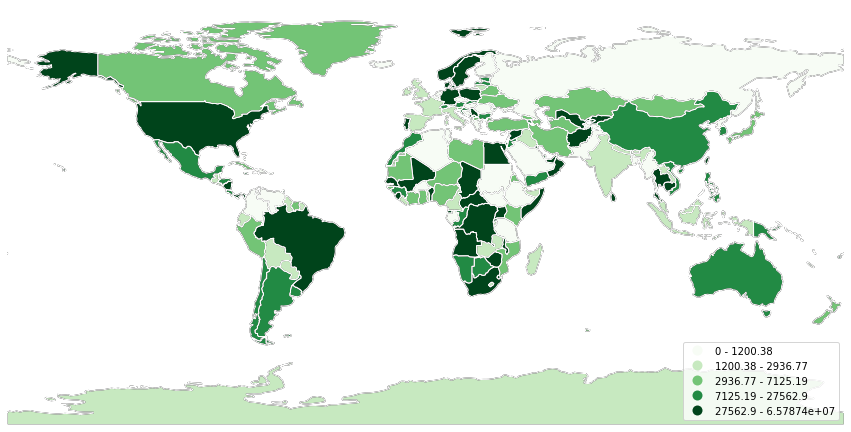

In [58]:
ax=geoplot.choropleth(
    world, hue=per_capita_2005, scheme=scheme,
    cmap='Greens', figsize=(15, 8), legend=True
)

geoplot.polyplot(world, edgecolor='white', zorder=1, ax=ax)

AttributeError: 'PathPatch' object has no property 'locations'

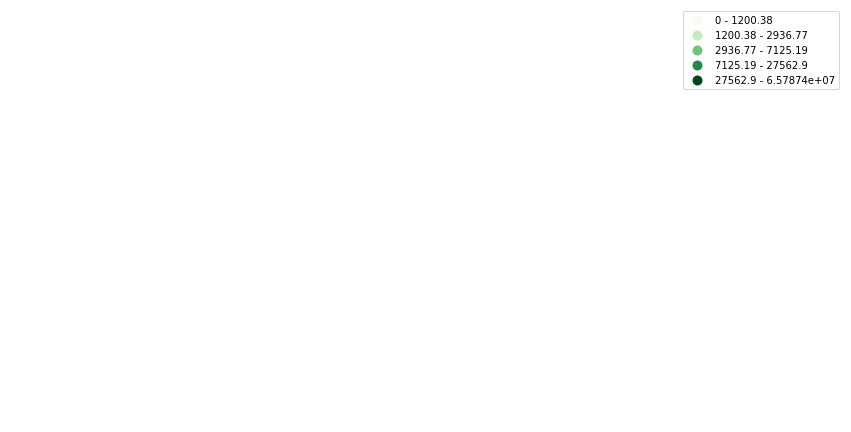

In [59]:
ax=geoplot.choropleth(
    world, hue=per_capita_2005, scheme=scheme,
    locations = per_capita_df['Country Name'],
    locationmode = 'country names',
    cmap='Greens', figsize=(15, 8), legend=True,
)


In [60]:
layout = dict(geo = {'scope':'world'})

In [62]:
data = dict(type = 'choropleth',
            locations = per_capita_df['Country Name'],
            locationmode = 'country names',
            #colorscale= 'Portland',
            #text= ['IND','NEP','CHI','PAK','BAN','BHU', 'MYN','SLK'],
            #z=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0],
            z=per_capita_2005,
            #colorbar = {'title':'Country Colours', 'len':200,'lenmode':'pixels' }
           )

For year 2015, plot the GDP per capita for only the countries having populations greater than 300000000. Interpret the data( generated plot)

In [63]:
per_capita_2015=imputed_numerical_gdp_df['2015']/imputed_numerical_pop_df['2015']

In [64]:
per_capita_2005

0      2.697989e+04
1      3.572347e+02
2      2.883979e+03
3      3.062674e+03
4      4.688081e+04
5      5.400540e+03
6      5.609292e+04
7      8.577865e+03
8      2.571547e+03
9      1.056523e+04
10     1.409710e+04
11     4.881389e+04
12     4.463786e+04
13     2.948206e+03
14     2.210964e+02
15     4.264168e+04
16     9.893723e+02
17     5.763717e+02
18     6.175427e+02
19     5.607713e+03
20     2.206621e+04
21     3.144228e+04
22     3.967195e+03
23     4.164186e+03
24     4.311500e+03
25     8.761639e+04
26     1.700183e+03
27     9.535419e+03
28     1.621653e+04
29     3.632950e+04
30     1.504456e+03
31     5.686781e+03
32     4.175019e+02
33     4.447108e+04
34     1.071610e+04
35     7.047144e+04
36     1.122508e+04
37     2.732166e+03
38     1.216187e+03
39     1.243081e+03
40     3.005624e+02
41     2.571786e+03
42     5.404123e+03
43     1.287869e+03
44     2.705135e+03
45     6.892923e+03
46     8.625090e+03
47     4.393830e+03
48     3.763398e+07
49     2.196113e+04


In [65]:
imputed_numerical_gdp_df[imputed_numerical_gdp_df['2015'].gt(300000000)]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,2.390503e+09,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,2.864567e+12,3.154333e+12
1,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10
2,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,8.379950e+10,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10
3,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,1.192693e+10,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10
4,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,3.449967e+09,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09
5,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,2.106021e+12,2.186392e+12,2.330478e+12,2.404687e+12,2.463539e+12,2.541721e+12,2.628693e+12,2.658585e+12,2.714145e+12,2.754272e+12
6,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,2.897873e+11,3.098704e+11,3.237669e+11,3.401280e+11,3.547001e+11,3.728109e+11,3.842225e+11,3.933421e+11,3.980223e+11,4.047000e+11
7,1.155739e+11,1.218470e+11,1.208089e+11,1.143961e+11,1.259848e+11,1.393006e+11,1.383816e+11,1.427988e+11,1.496852e+11,1.641741e+11,...,4.236274e+11,4.490618e+11,4.444525e+11,4.551431e+11,4.437071e+11,4.558254e+11,4.463428e+11,4.582538e+11,4.468809e+11,4.372151e+11
8,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.112310e+10,1.147904e+10,1.150200e+10,1.236465e+10,1.300761e+10,1.399619e+10
9,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,5.760000e+08,5.776916e+08,5.523172e+08,5.370925e+08,5.421674e+08,5.497797e+08,5.345551e+08,5.032599e+08,5.142555e+08,3.154333e+12


In [66]:
imputed_numerical_gdp_df[imputed_numerical_gdp_df['2015'].lt(70000000)]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
232,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,3.182352e+07,3.421536e+07,3.290294e+07,3.440885e+07,3.487269e+07,3.806106e+07,3.921611e+07,4.082163e+07,4.184217e+07,4.592433e+07
